___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using algorithms ***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn import decomposition, ensemble
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from textblob import TextBlob
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv", index_col=0)

In [3]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Data Wrangling
Take info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
data.shape

(23486, 10)

In [6]:
data.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [7]:
data["Review Text"][1]

'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

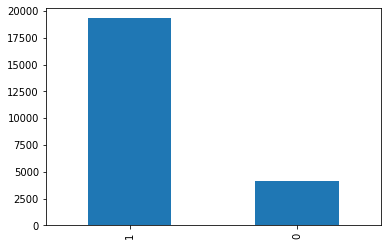

In [8]:
data["Recommended IND"].value_counts().plot.bar()

In [9]:
data["Recommended IND"].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

---
---


## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [10]:
df = pd.DataFrame()
df["sentences"] = data["Review Text"]
df["label"] = data["Recommended IND"]

In [11]:
df.head()

,sentences,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


### Missing Value Detection

In [12]:
df.isnull().sum()

sentences    845
label          0
dtype: int64

In [13]:
df.shape

(23486, 2)

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(22641, 2)

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization

In [16]:
df["sentences"]=df["sentences"].apply(lambda x: word_tokenize(x.lower()))

In [17]:
df.sentences[0:5]

0    [absolutely, wonderful, -, silky, and, sexy, a...
1    [love, this, dress, !, it, 's, sooo, pretty, ....
2    [i, had, such, high, hopes, for, this, dress, ...
3    [i, love, ,, love, ,, love, this, jumpsuit, .,...
4    [this, shirt, is, very, flattering, to, all, d...
Name: sentences, dtype: object

### Noise Removal

In [18]:
df["sentences"]=df["sentences"].apply(lambda x: list(i for i in x if i.isalpha()))

In [19]:
df.sentences[0:5]

0    [absolutely, wonderful, silky, and, sexy, and,...
1    [love, this, dress, it, sooo, pretty, i, happe...
2    [i, had, such, high, hopes, for, this, dress, ...
3    [i, love, love, love, this, jumpsuit, it, fun,...
4    [this, shirt, is, very, flattering, to, all, d...
Name: sentences, dtype: object

In [20]:
stop_words = stopwords.words('english')
df["sentences"]=df["sentences"].apply(lambda x: list(i for i in x if i not in stop_words))

In [21]:
df.sentences[0:5]

0    [absolutely, wonderful, silky, sexy, comfortable]
1    [love, dress, sooo, pretty, happened, find, st...
2    [high, hopes, dress, really, wanted, work, ini...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
Name: sentences, dtype: object

### Lexicon Normalization

In [22]:
lem=WordNetLemmatizer()
df["sentences"]=df["sentences"].apply(lambda x: list(lem.lemmatize(i) for i in x))

In [23]:
df.sentences[0:5]

0    [absolutely, wonderful, silky, sexy, comfortable]
1    [love, dress, sooo, pretty, happened, find, st...
2    [high, hope, dress, really, wanted, work, init...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
Name: sentences, dtype: object

In [24]:
df.head()

,sentences,label
0,"[absolutely, wonderful, silky, sexy, comfortable]",1
1,"[love, dress, sooo, pretty, happened, find, st...",1
2,"[high, hope, dress, really, wanted, work, init...",0
3,"[love, love, love, jumpsuit, fun, flirty, fabu...",1
4,"[shirt, flattering, due, adjustable, front, ti...",1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentences  22641 non-null  object
 1   label      22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


---
---


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [26]:
df["sentences"]=df["sentences"].apply(lambda x: " ".join(x))

In [27]:
df.head()

,sentences,label
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store gla...,1
2,high hope dress really wanted work initially o...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1


### Collect Words (positive and negative separately)

In [28]:
positive = " ".join(df[df["label"]==1].sentences.tolist())

In [29]:
negative = " ".join(df[df["label"]==0].sentences.tolist())

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [31]:
wordcloud_pos = WordCloud(background_color = "white", max_words = 500)

In [32]:
wordcloud_neg = WordCloud(background_color = "white", max_words = 500)

In [33]:
wordcloud_pos.generate(positive)
wordcloud_neg.generate(negative)

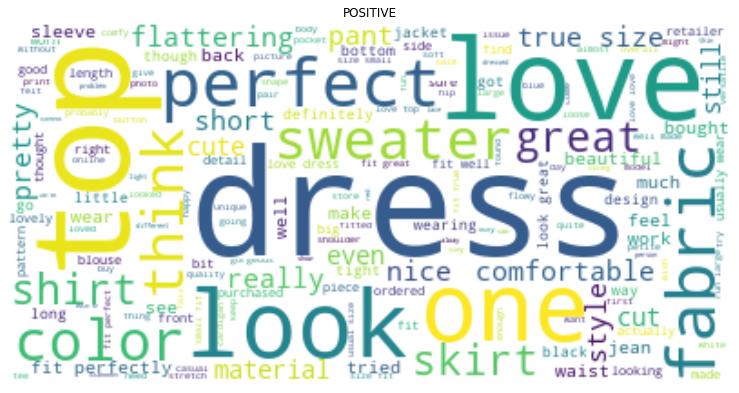

In [34]:
plt.figure(figsize=(13,13))
plt.imshow(wordcloud_pos, interpolation = "bilinear")
plt.axis("off")
plt.title("POSITIVE")
plt.show()

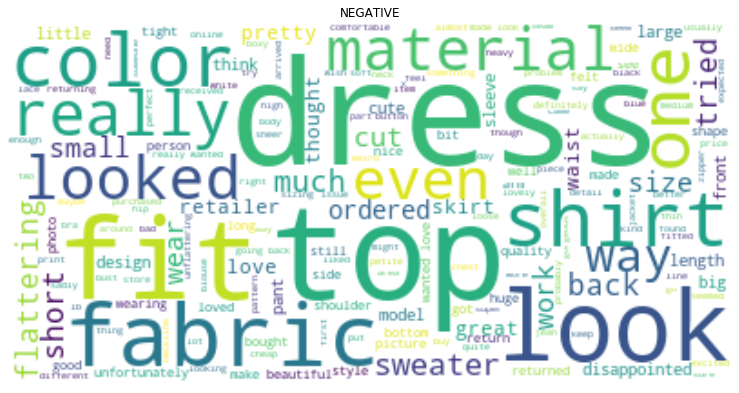

In [35]:
plt.figure(figsize=(13,13))
plt.imshow(wordcloud_neg, interpolation = "bilinear")
plt.axis("off")
plt.title("NEGATIVE")
plt.show()

## 5. Sentiment Classification with Machine Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [36]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df["sentences"], df["label"], random_state=1)

In the next step we create a numerical feature vector for each document:

### Vectorization

In [37]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [38]:
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [39]:
vectorizer.get_feature_names()[:5]

['aa', 'aaaaaaamazing', 'aaaaannnnnnd', 'aaaahs', 'aaahed']

In [40]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
a = pd.DataFrame(X_train_count.toarray(), columns=vectorizer.get_feature_names())

In [42]:
a.head()

,aa,aaaaaaamazing,aaaaannnnnnd,aaaahs,aaahed,aame,ab,abbey,abby,abck,...,zipped,zipper,zippered,zipping,zombie,zone,zoolander,zoom,zooming,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [43]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X_train)

TfidfVectorizer()

In [44]:
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [45]:
tfidf_vectorizer.get_feature_names()[:5]

['aa', 'aaaaaaamazing', 'aaaaannnnnnd', 'aaaahs', 'aaahed']

In [46]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
b = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names())

In [48]:
b.head()

,aa,aaaaaaamazing,aaaaannnnnnd,aaaahs,aaahed,aame,ab,abbey,abby,abck,...,zipped,zipper,zippered,zipping,zombie,zone,zoolander,zoom,zooming,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.423891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Import Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
import seaborn as sns
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
font_title = {'family': 'times new roman', 'color': 'darkred',
              'weight': 'bold', 'size': 14}
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

### Logistic Regression

In [50]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_count, y_train)
# Make predictions
y_pred = log_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 612  392]
 [ 204 4453]]
              precision    recall  f1-score   support

           0       0.75      0.61      0.67      1004
           1       0.92      0.96      0.94      4657

    accuracy                           0.89      5661
   macro avg       0.83      0.78      0.80      5661
weighted avg       0.89      0.89      0.89      5661



In [51]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_count, y_train)
log_accuracy_count = model_selection.cross_val_score(log_classifier,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", log_accuracy_count)
log_f1_count = f1_score(y_test, y_pred)
print("Count Vectors f1_score:", log_f1_count)

Count Vectors Accuracy: 0.8858844205133958
Count Vectors f1_score: 0.9372763628709745


In [52]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_tfidf, y_train)
log_accuracy_tfidf = model_selection.cross_val_score(log_classifier,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", log_accuracy_tfidf)
log_f1_tfidf = f1_score(y_test, y_pred)
print("TF-IDF Vectors f1_score:", log_f1_tfidf)

TF-IDF Accuracy: 0.8766986993724333
TF-IDF Vectors f1_score: 0.9372763628709745


### Naive Bayes 



In [53]:
from sklearn.naive_bayes import MultinomialNB 

In [54]:
mnb = MultinomialNB()

In [55]:
mnb.fit(X_train_count.todense(), y_train)

MultinomialNB()

In [56]:
y_pred = mnb.predict(X_test_count.todense())

In [57]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 661  343]
 [ 256 4401]]
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      1004
           1       0.93      0.95      0.94      4657

    accuracy                           0.89      5661
   macro avg       0.82      0.80      0.81      5661
weighted avg       0.89      0.89      0.89      5661



In [58]:
mnb = MultinomialNB()
mnb.fit(X_train_count.todense(), y_train)
nby_accuracy_count = model_selection.cross_val_score(mnb,
                                           X_test_count.todense(),
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", nby_accuracy_count)
nby_f1_count = f1_score(y_test, y_pred)
print("Count Vectors f1_score:", nby_f1_count)

Count Vectors Accuracy: 0.8775820915985817
Count Vectors f1_score: 0.9362833741091373


In [59]:
mnb = MultinomialNB()
mnb.fit(X_train_tfidf.todense(), y_train)
nby_accuracy_tfidf = model_selection.cross_val_score(mnb,
                                           X_test_tfidf.todense(),
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", nby_accuracy_tfidf)
nby_f1_tfidf = f1_score(y_test, y_pred)
print("TF-IDF Vectors f1_score:", nby_f1_tfidf)

Count Vectors Accuracy: 0.8229996697016719
TF-IDF Vectors f1_score: 0.9362833741091373


### Support Vector Machine (SVM)

In [60]:
svm_model = SVC()
svm_model.fit(X_train_count, y_train)
y_pred = svm_model.predict(X_test_count)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 508  496]
 [ 108 4549]]
              precision    recall  f1-score   support

           0       0.82      0.51      0.63      1004
           1       0.90      0.98      0.94      4657

    accuracy                           0.89      5661
   macro avg       0.86      0.74      0.78      5661
weighted avg       0.89      0.89      0.88      5661



In [61]:
svm_model = SVC()
svm_model.fit(X_train_count, y_train)
svm_accuracy_count = model_selection.cross_val_score(svm_model,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", svm_accuracy_count)
svm_f1_count = f1_score(y_test, y_pred)
print("Count Vectors f1_score:", svm_f1_count)

Count Vectors Accuracy: 0.8781105689232896
Count Vectors f1_score: 0.9377447948876521


In [62]:
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)
svm_accuracy_tfidf = model_selection.cross_val_score(svm_model,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", svm_accuracy_tfidf)
svm_f1_tfidf = f1_score(y_test, y_pred)
print("TF-IDF Vectors f1_score:", svm_f1_tfidf)

Count Vectors Accuracy: 0.8827042084992615
TF-IDF Vectors f1_score: 0.9377447948876521


### Random Forest

In [63]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_count,y_train)
y_pred = rf_model.predict(X_test_count)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 267  737]
 [  37 4620]]
              precision    recall  f1-score   support

           0       0.88      0.27      0.41      1004
           1       0.86      0.99      0.92      4657

    accuracy                           0.86      5661
   macro avg       0.87      0.63      0.67      5661
weighted avg       0.87      0.86      0.83      5661



In [64]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_count,y_train)
rf_accuracy_count = model_selection.cross_val_score(rf_model,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", rf_accuracy_count)
rf_f1_count = f1_score(y_test, y_pred)
print("Count Vectors f1_score:", rf_f1_count)

Count Vectors Accuracy: 0.848435445373019
Count Vectors f1_score: 0.9227082085080887


In [65]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf,y_train)
rf_accuracy_tfidf = model_selection.cross_val_score(rf_model,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", rf_accuracy_tfidf)
rf_f1_tfidf = f1_score(y_test, y_pred)
print("TF-IDF Vectors f1_score:", rf_f1_tfidf)

Count Vectors Accuracy: 0.8449037460816025
TF-IDF Vectors f1_score: 0.9227082085080887


### Ada  Boosting

In [66]:
from sklearn.ensemble import AdaBoostClassifier

In [67]:
adab_classifier = AdaBoostClassifier()
adab_classifier.fit(X_train_count , y_train)
# Make predictions
y_pred = adab_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 450  554]
 [ 189 4468]]
              precision    recall  f1-score   support

           0       0.70      0.45      0.55      1004
           1       0.89      0.96      0.92      4657

    accuracy                           0.87      5661
   macro avg       0.80      0.70      0.74      5661
weighted avg       0.86      0.87      0.86      5661



In [68]:
adab_classifier = AdaBoostClassifier()
adab_classifier.fit(X_train_count , y_train)
adab_accuracy_count = model_selection.cross_val_score(adab_classifier,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", adab_accuracy_count)
adab_f1_count = f1_score(y_test, y_pred)
print("Count Vectors f1_score:", adab_f1_count)

Count Vectors Accuracy: 0.863806158505805
Count Vectors f1_score: 0.9232358714743258


In [69]:
adab_classifier = AdaBoostClassifier()
adab_classifier.fit(X_train_tfidf , y_train)
adab_accuracy_tfidf = model_selection.cross_val_score(adab_classifier,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", adab_accuracy_tfidf)
adab_f1_tfidf = f1_score(y_test, y_pred)
print("TF-IDF Vectors f1_score:", adab_f1_tfidf)

Count Vectors Accuracy: 0.8595655642180967
TF-IDF Vectors f1_score: 0.9232358714743258


### XGBoost

In [70]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_count , y_train)
# Make predictions
y_pred = xgb_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 511  493]
 [ 154 4503]]
              precision    recall  f1-score   support

           0       0.77      0.51      0.61      1004
           1       0.90      0.97      0.93      4657

    accuracy                           0.89      5661
   macro avg       0.83      0.74      0.77      5661
weighted avg       0.88      0.89      0.88      5661



In [71]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_count , y_train)
xgb_accuracy_count = model_selection.cross_val_score(xgb_classifier,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", xgb_accuracy_count)
xgb_f1_count = f1_score(y_test, y_pred)
print("Count Vectors f1_score:", xgb_f1_count)

Count Vectors Accuracy: 0.883412480291161
Count Vectors f1_score: 0.9329742049103905


In [72]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_tfidf , y_train)
xgb_accuracy_tfidf = model_selection.cross_val_score(xgb_classifier,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:",xgb_accuracy_tfidf)
xgb_f1_tfidf = f1_score(y_test, y_pred)
print("TF-IDF Vectors f1_score:", xgb_f1_tfidf)

TF-IDF Accuracy: 0.8804083235178641
TF-IDF Vectors f1_score: 0.9329742049103905


### Compare Models Accuracies and F1 Scores

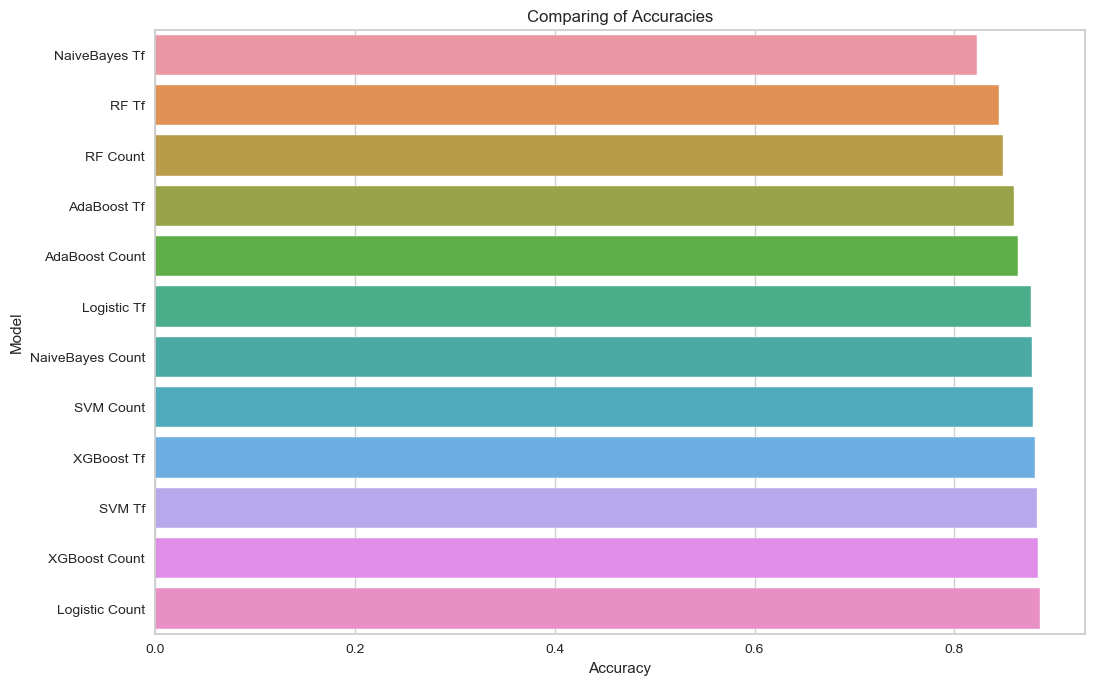

In [73]:
compare = pd.DataFrame({"Model": ["Logistic Count", "Logistic Tf", "XGBoost Count", "XGBoost Tf", "RF Count","RF Tf", "SVM Count", "SVM Tf", "AdaBoost Count", "AdaBoost Tf", "NaiveBayes Count", "NaiveBayes Tf"],
                        "Accuracy": [log_accuracy_count, log_accuracy_tfidf, xgb_accuracy_count, xgb_accuracy_tfidf, rf_accuracy_count, rf_accuracy_tfidf, svm_accuracy_count, svm_accuracy_tfidf, adab_accuracy_count, adab_accuracy_tfidf, nby_accuracy_count, nby_accuracy_tfidf]})
compare = compare.sort_values(by="Accuracy", ascending=True)
plt.figure(figsize=(12,8))
plt.title("Comparing of Accuracies")
ax = sns.barplot(x="Accuracy", y="Model", data=compare)

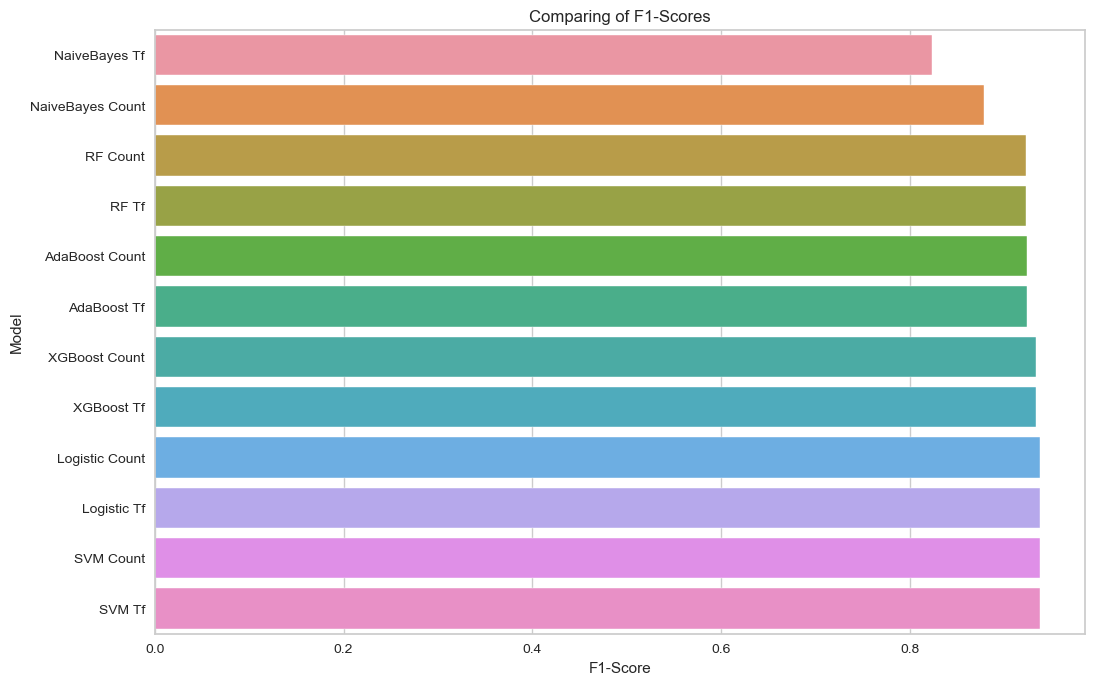

In [74]:
compare = pd.DataFrame({"Model": ["Logistic Count", "Logistic Tf", "XGBoost Count", "XGBoost Tf", "RF Count","RF Tf", "SVM Count", "SVM Tf", "AdaBoost Count", "AdaBoost Tf", "NaiveBayes Count", "NaiveBayes Tf"],
                        "F1-Score": [log_f1_count, log_f1_tfidf, xgb_f1_count, xgb_f1_tfidf, rf_f1_count, rf_f1_tfidf, svm_f1_count, svm_f1_tfidf, adab_f1_count, adab_f1_tfidf, nby_accuracy_count, nby_accuracy_tfidf]})
compare = compare.sort_values(by="F1-Score", ascending=True)
plt.figure(figsize=(12,8))
plt.title("Comparing of F1-Scores")
ax = sns.barplot(x="F1-Score", y="Model", data=compare)

### Conclusion

This project was aimed to used sentiment analysis to determined product recommendation. We started with the data engineering and text mining, which cover change text into tokens, remove punctuation, numbers, stop words and normalization them by using lemmatization. Following we used bag of words model to convert the text into numerical feature vectors. Finally we started training 5 different Classification models and we got the best accuracy of 0.88 for Logistic Regression method. 

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___